<div align="center">

# <h1 style="color: #3498db; font-size: 36px;">EYE FOR BLIND</h1>

</div>


**Problem Statement:**
In this capstone project, a deep learning model is required to be created, capable of expressing the content of an image through speech using caption generation along with an attention mechanism. The project utilizes the Flickr8K dataset and targets a use-case for individuals with visual impairments, enabling them to comprehend images through speech assistance. The generated captions, produced by a CNN-RNN model, will be converted into speech using a text-to-speech library.

This problem statement embodies the amalgamation of both deep learning and natural language processing. An image's attributes will be extracted by an encoder based on CNN architecture, followed by interpretation through an RNN model.

In [2]:
#Importing all the required libraries

#Import all the required libraries

!pip install wordcloud
!pip install gTTs
!pip install playsound

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For enhanced data visualization
import glob  # For file handling and manipulation

from skimage import io  # For image loading and manipulation
pd.set_option('display.max_colwidth', -1)  # Set the max column width to see the complete caption

import collections  # For working with collections like Counter
from wordcloud import WordCloud, STOPWORDS  # For generating word clouds from text data

import tensorflow as tf  # For deep learning and neural networks
import keras  # High-level neural networks API
from keras.preprocessing.image import load_img  # For loading images
import string  # For working with string operations
import time  # For timing and performance measurement
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from keras.preprocessing.text import Tokenizer  # For text data preprocessing

from tensorflow.keras.applications.inception_v3 import InceptionV3  # Pre-trained image classification model
from tensorflow.keras.models import Model  # For building neural network models
from tensorflow.keras import layers  # Different types of layers for building models
from tensorflow.keras import activations  # Activation functions for neural networks
from tensorflow.keras import Input  # For defining input layers
from tqdm import tqdm  # For creating progress bars and monitoring loops
from PIL import Image  # Python Imaging Library for working with images

from gtts import gTTS  # Google Text-to-Speech API for text-to-speech conversion
from playsound import playsound  # For playing audio files
from IPython import display  # For displaying multimedia content in IPython environments


import warnings
warnings.filterwarnings('ignore')#to ignore warnings

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


/tmp/ipykernel_2064/316000053.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  # Set the max column width to see the complete caption
playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


Let's read the dataset

## <h2 style="color: #3498db;">Data Understanding</h2>


1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [3]:
#Import the dataset and read the image into a seperate variable
#link:https://www.kaggle.com/datasets/adityajn105/flickr8k
images='Capstone'
all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


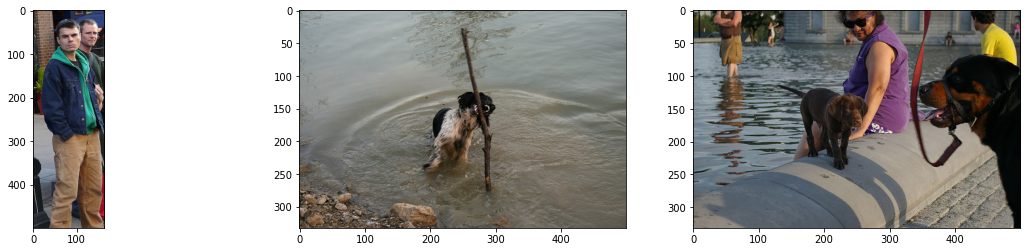

In [3]:
#Visualise both the images & text present in the dataset

# Select the first three images for display
Display_Images = all_imgs[0:3]

# Create a subplot with one row and three columns
figure, axes = plt.subplots(1, 3)

# Set the width of the figure
figure.set_figwidth(20)

# Iterate through the axes and images to display
for ax, image in zip(axes, Display_Images):
    # Load and display the image using skimage's io.imread function
    ax.imshow(io.imread(image), cmap=None)

In [4]:
# Define the path to the text file
text_file = 'captions.txt'

# Function to load the content of a text file
def load_doc(text_file):
    # Open the text file for reading
    open_file = open(text_file, 'r', encoding="latin-1")
    
    # Read the entire content of the file
    text = open_file.read()
    
    # Close the file after reading
    open_file.close()
    
    # Return the text content
    return text

# Load the content of the text file using the defined function
doc = load_doc(text_file)

# Print the first 300 characters of the loaded content
print(doc[:300])


image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


**Create a dataframe which summarizes the image, path & captions as a dataframe**

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [5]:
# Define the path to the directory containing images
image_path = 'Capstone/'

# Lists to store image information
all_img_id = []        # Store all the image IDs here
all_img_vector = []    # Store all the image paths here
annotations = []       # Store all the captions here

# Open and read the captions file
with open('captions.txt', 'r') as fo:
    next(fo)  # Skip the heading line
    for line in fo:
        # Split the line into parts using comma as the delimiter
        split_arr = line.split(',')
        
        # Store image ID, caption, and image path components
        all_img_id.append(split_arr[0])
        annotations.append(split_arr[1].rstrip('\n.'))  # Remove newline and period at the end of caption
        all_img_vector.append(image_path + split_arr[0])

# Create a DataFrame to organize the collected information
import pandas as pd
df = pd.DataFrame(list(zip(all_img_id, all_img_vector, annotations)),
                  columns=['ID', 'Path', 'Captions'])

# Display the DataFrame
df


,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,Capstone/1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way
1,1000268201_693b08cb0e.jpg,Capstone/1000268201_693b08cb0e.jpg,A girl going into a wooden building
2,1000268201_693b08cb0e.jpg,Capstone/1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e.jpg,Capstone/1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse
4,1000268201_693b08cb0e.jpg,Capstone/1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin
...,...,...,...
40450,997722733_0cb5439472.jpg,Capstone/997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,Capstone/997722733_0cb5439472.jpg,A man is rock climbing high in the air
40452,997722733_0cb5439472.jpg,Capstone/997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock face covered in assist handles
40453,997722733_0cb5439472.jpg,Capstone/997722733_0cb5439472.jpg,A rock climber in a red shirt


In [6]:
# Create a list containing all the captions
annotations = df["Captions"].tolist()

# Add the <start> & <end> tokens to all the captions
for i in range(len(annotations)):
    annotations[i] = '<start> ' + annotations[i] + ' <end>'

# Create a list containing all the paths to the images
all_img_path = df["Path"].tolist()

# Print the total number of captions and images in the dataset
print("Total captions present in the dataset: " + str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))


Total captions present in the dataset: 40455
Total images present in the dataset: 40455


In [7]:
# Create the vocabulary & the counter for the captions

# Create a list of all words in the captions (converted to lowercase)
vocabulary = [word.lower() for line in annotations for word in line.split()]

# Use collections.Counter to count the occurrences of each word
val_count = collections.Counter(vocabulary)

# Print the counter to see the word frequency
val_count


Counter({'<start>': 40455,
         'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         '<end>': 40455,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
        

a :  60196
<start> :  40455
<end> :  40455
in :  18174
the :  17507
on :  10357
is :  9069
and :  8057
dog :  7948
with :  7304
man :  7137
of :  6495
two :  5132
white :  3706
black :  3620
boy :  3514
are :  3365
woman :  3304
girl :  3277
to :  3005
wearing :  2916
people :  2811
at :  2810
water :  2676
young :  2587
red :  2553
brown :  2457
an :  2325
his :  2255
blue :  2125


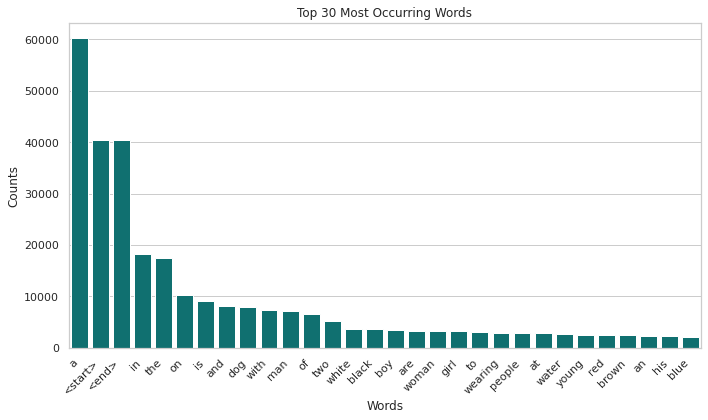

In [8]:
# Visualize the top 30 occurring words in the captions

# Iterate through the most common 30 words and print them with their counts
for word, count in val_count.most_common(30):
    print(word, ": ", count)

# Create a list of the most common words and their counts
lst = val_count.most_common(30)

# Create a DataFrame to organize the most common words and counts
most_common_words_df = pd.DataFrame(lst, columns=['Word', 'Count'])

# Create a bar plot to visualize the most common words


# Set the style of the plot using Seaborn
sns.set(style="whitegrid")

# Create a bar plot with a visually appealing style
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.barplot(x='Word', y='Count', data=most_common_words_df, color='teal')

# Customize plot appearance
plt.title("Top 30 Most Occurring Words")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


## <h2 style="color: #3498db;">Pre-Processing the captions</h2>

1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [9]:
# create the tokenizer

# Define the maximum number of words in the vocabulary
top_voc = 5000

# Create a Tokenizer object
tokenizer = Tokenizer(num_words=top_voc + 1,  # Add 1 for the <UNK> token
                      filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ',  # Characters to filter out
                      lower=True,  # Convert text to lowercase
                      char_level=False,  # Tokenize at word level
                      oov_token="UNK")  # Token for out-of-vocabulary words


In [10]:
# Create word-to-index and index-to-word mappings.

# Fit the Tokenizer on the captions
tokenizer.fit_on_texts(annotations)
# This step updates the internal vocabulary of the tokenizer based on the provided list of texts.

# Convert captions to sequences of integers
train_seqs = tokenizer.texts_to_sequences(annotations)
# This step transforms each caption in the annotations list into a sequence of integers using the learned vocabulary.


<start> :  40455
<end> :  40455
a :  38716
A :  21480
in :  18170
the :  14587
on :  10354
is :  9069
and :  8057
dog :  7804
with :  7303
man :  6727
of :  6495
Two :  3962
white :  3646
black :  3491
boy :  3395
are :  3364
girl :  3174
woman :  3146
to :  3005
The :  2919
wearing :  2916
at :  2809
water :  2671
red :  2542
young :  2411
people :  2397
brown :  2383
his :  2255


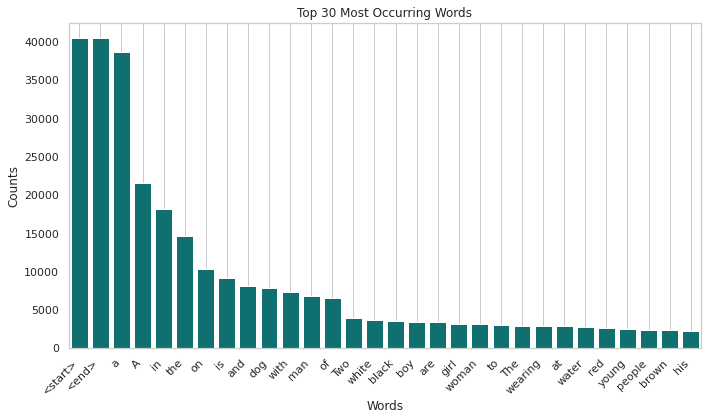

In [11]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing

# Extract all words from tokenized captions
tokenizer_top_words = [word for line in annotations for word in line.split()]

# Count the occurrences of each word
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)

# Print the top 30 most common words
for word, count in tokenizer_top_words_count.most_common(30):
    print(word, ": ", count)

# Create a list of the most common words and their counts
token_lst = tokenizer_top_words_count.most_common(30)

# Create a DataFrame to organize the most common words and counts
most_common_words_df = pd.DataFrame(token_lst, columns=['Word', 'Count'])

# Set the style of the plot using Seaborn
sns.set(style="whitegrid")

# Create a bar plot with a visually appealing style
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.barplot(x='Word', y='Count', data=most_common_words_df, color='teal')  # Use teal color

# Customize plot appearance
plt.title("Top 30 Most Occurring Words")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display grid
plt.grid(b=None)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

# Calculate the length of each sequence in train_seqs and store them in a list
train_seqs_len = [len(seq) for seq in train_seqs]
# This list stores the length of each sequence in the train_seqs list. It can be used if needed in the future.

# Find the length of the longest sequence
longest_word_length = max(train_seqs_len)
# The Python list method max returns the element with the maximum value from the list of sequence lengths.
# This value represents the length of the longest sequence.

# Pad the sequences to the length of the longest sequence
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(
    train_seqs,  # List of sequences to pad
    padding='post',  # Add padding at the end of sequences
    maxlen=longest_word_length,  # Pad sequences to the length of the longest one
    dtype='int32',  # Data type of the resulting sequences
    value=0  # Padding value to use
)
# This step uses the pad_sequences function from Keras to pad the sequences with zeros.
# It ensures that all sequences have the same length, which is the length of the longest sequence.

# Print the shape of the resulting caption vector
print("The shape of Caption vector is: " + str(cap_vector.shape))
# This line prints the shape (dimensions) of the cap_vector array to the console.

The shape of Caption vector is: (40455, 35)


## <h2 style="color: #3498db;">Pre-processing the images</h2>

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


2023-08-24 18:19:09.413788: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-08-24 18:19:09.413851: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14802 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:1d:00.0, compute capability: 7.5
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [

Shape after resize: (299, 299, 3)
Shape after resize: (299, 299, 3)
Shape after resize: (299, 299, 3)
Shape after resize: (299, 299, 3)
Shape after resize: (299, 299, 3)


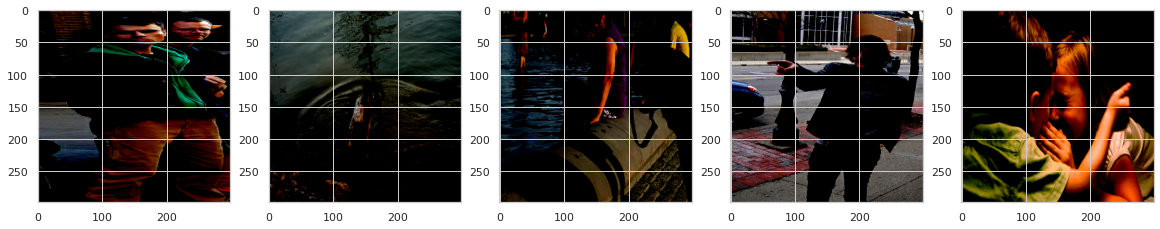

In [13]:
#write your code here to create the dataset consisting of image paths
# Create a list to store preprocessed images
preprocessed_img = []

IMAGE_SHAPE= (299, 299)
# Iterate through the first 5 image paths
for img in all_imgs[0:5]:
    # Read the image file
    img = tf.io.read_file(img, name=None)
    
    # Decode the JPEG-encoded image
    img = tf.image.decode_jpeg(img, channels=0)
    # Since it's an RGB image, you can also set channels=3 to output an RGB image.
    
    # Resize the image to the desired shape
    img = tf.image.resize(img, IMAGE_SHAPE)
    
    # Preprocess the image using InceptionV3's preprocessing function
    img = tf.keras.applications.inception_v3.preprocess_input(img, data_format=None)
    # The default value for data format is None, which refers to the global setting tf.keras.backend.image_data_format().
    
    # Append the preprocessed image to the list
    preprocessed_img.append(img)
    
# Select the first 5 preprocessed images for display
Display_Images = preprocessed_img[0:5]

# Create a subplot with 1 row and 5 columns
figure, axes = plt.subplots(1, 5)

# Set the width of the figure
figure.set_figwidth(20)

# Iterate through the axes and images to display
for ax, image in zip(axes, Display_Images):
    # Print the shape of the resized image
    print("Shape after resize:", image.shape)
    
    # Display the image on the axis
    ax.imshow(image)
    
    # Turn off the grid for cleaner visualization
    ax.grid('off')


In [14]:
#write your code here for creating the function. This function should return images & their path

# Define a function to load and preprocess images
def load_image(image_path):
    # Load the image file
    img = tf.io.read_file(image_path, name=None)
    
    # Decode the JPEG-encoded image
    # By default, channels=0 uses the number of channels in the image.
    # For RGB images, channels=3 can be used to output an RGB image.
    img = tf.image.decode_jpeg(img, channels=0)
    
    # Resize the image to the desired shape
    img = tf.image.resize(img, IMAGE_SHAPE)
    
    # Preprocess the image using InceptionV3's preprocessing function
    # The default value for data format is None, referring to the global setting tf.keras.backend.image_data_format().
    img = tf.keras.applications.inception_v3.preprocess_input(img, data_format=None)
    
    # Return the preprocessed image and its path
    return img, image_path

    

In [15]:
#write your code here for applying the function to the image path dataset, such that the transformed dataset should contain images & their path

# Sort and store unique image paths in a list
training_list = sorted(set(all_img_vector))

# Create a Dataset using tf.data.Dataset.from_tensor_slices
New_Image_Data = tf.data.Dataset.from_tensor_slices(training_list)

# Map the preprocess_images_function across the elements of the dataset
# Use num_parallel_calls=tf.data.experimental.AUTOTUNE for dynamic parallelism
New_Image_Data = New_Image_Data.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Create batches of data
# Use batch_size=64 and set drop_remainder=False to keep the last batch
New_Image_Data = New_Image_Data.batch(64, drop_remainder=False)




## <h2 style="color: #3498db;">Load the pretrained Imagenet weights of Inception net V3</h2>

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [16]:
# Load the InceptionV3 model for image feature extraction
image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

# Get the input layer of the image_model
new_input = image_model.input

# Get the output layer of the image_model
hidden_layer = image_model.layers[-1].output

# Build the final image features extraction model
# Using keras.Model
# image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

# Using tf.compat.v1.keras.Model
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)


In [17]:
# Display a summary of the image features extraction model
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [18]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)

# Dictionary to store image features
image_features_dict = {}

# Iterate through the images in the dataset with a progress bar (using tqdm)
for image, image_path in tqdm(New_Image_Data):
    # Extract features for the current batch of images using the image_features_extract_model
    features_for_batch = image_features_extract_model(image)
    
    # Reshape the features to have a flattened shape
    features_for_batch_flattened = tf.reshape(features_for_batch,
                                              (features_for_batch.shape[0], -1, features_for_batch.shape[3]))
    # We are reshaping the features to have a 2D shape (batch_size, flattened_size, num_features)
    
    # Iterate through the batch of features and paths
    for batch_feat, path in zip(features_for_batch_flattened, image_path):
        # Decode the path from bytes to string
        feature_path = path.numpy().decode("utf-8")
        
        # Store the batch features in the dictionary using the image path as the key
        image_features_dict[feature_path] = batch_feat.numpy()


100%|██████████| 127/127 [00:30<00:00,  4.12it/s]


In [19]:
# Print the number of images with extracted features
print("Number of images with extracted features:", len(image_features_dict))

# Print the shape of the last batch's flattened features
print("Shape of the last batch's flattened features:", batch_feat.shape)


Number of images with extracted features: 8091
Shape of the last batch's flattened features: (64, 2048)


### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## <h2 style="color: #3498db;">Dataset Creation</h2>

1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [20]:
#write your code here

# Split the data into training and testing sets using train_test_split
# path_train: Paths of images for training
# path_test: Paths of images for testing
# cap_train: Corresponding captions for training
# cap_test: Corresponding captions for testing
path_train, path_test, cap_train, cap_test = train_test_split(
    all_img_vector,  # List of image paths
    cap_vector,      # List of corresponding captions
    test_size=0.2,   # Size of the testing set (20%)
    random_state=42  # Seed for reproducibility
)

    
 

In [21]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [22]:
# Create a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.
# Define a mapping function for the dataset
def map_func(image, captions):
    # Get the image features tensor from the image_features_dict using the image path as key
    img_tensor = image_features_dict[image.decode('utf-8')]
    
    # Return the image tensor and its corresponding captions
    return img_tensor, captions


### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [23]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

    
# Size of the buffer used for shuffling (it maintains a buffer in which it shuffles elements)
BUFFER_SIZE = 1000

# Batch size for training
BATCH_SIZE = 64  # You've mentioned that you tried different batch sizes and settled on 64.

def gen_dataset(images_data, captions_data):
    # Create a Dataset using tf.data.Dataset.from_tensor_slices
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))

    # Map function to preprocess each item in the dataset
    # Use tf.numpy_function to call the model_input function for each item
    dataset = dataset.map(
        lambda item1, item2: tf.numpy_function(map_func, [item1, item2], [tf.float32, tf.int32]),
        num_parallel_calls=tf.data.experimental.AUTOTUNE
    )

    # Shuffle, batch, and prefetch the dataset for efficient processing
    dataset = (
        dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=True)
        .batch(BATCH_SIZE, drop_remainder=False)
        .prefetch(tf.data.experimental.AUTOTUNE)
    )

    return dataset



In [24]:
train_dataset=gen_dataset(path_train,cap_train)
test_dataset=gen_dataset(path_test,cap_test)

In [25]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 35)


## <h2 style="color: #3498db;">Model Building</h2>

1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [26]:
# Dimensionality of the word embedding
embedding_dim = 256 

# Number of units.
units = 512

# Vocabulary size, including a reserved token
vocab_size = 5001  # Top 5,000 words + 1 for reserved token

# Number of training steps per epoch
train_num_steps = len(path_train) // BATCH_SIZE  # len(total train images) // BATCH_SIZE

# Number of testing steps per epoch
test_num_steps = len(path_test) // BATCH_SIZE   # len(total test images) // BATCH_SIZE

# Maximum length of captions after padding
max_length = 31

# Shape of the image features tensor
features_shape = batch_feat.shape[1]

# Shape of the attention features tensor
attention_features_shape = batch_feat.shape[0]


<h3 style="color: #3498db;">Encoder</h3>

In [27]:
# Define the Encoder class
class Encoder(Model):
    def __init__(self, embed_dim):
        super(Encoder, self).__init__()
        
        # Build a Dense layer with ReLU activation
        self.dense = tf.keras.layers.Dense(embed_dim, activation='relu')
        
    def call(self, features):
        # Pass the image features through the dense layer
        features = self.dense(features)
        
        # Apply ReLU activation with specified parameters
        features = tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        
        return features


In [28]:
encoder=Encoder(embedding_dim)

<h3 style="color: #3498db;">Attention model</h3>

In [29]:
# Define the Attention_model class
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        
        # Build Dense layers
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        
        # Build the final Dense layer for attention weights
        self.V = tf.keras.layers.Dense(1)
        
        self.units = units

    def call(self, features, hidden):
        # Expand the hidden shape for broadcasting
        hidden_with_time_axis = hidden[:, tf.newaxis]
        
        # Calculate the score using tanh activation
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
        
        # Apply softmax to get attention weights
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1)
        
        # Calculate the context vector
        context_vector = attention_weights * features
        
        # Reduce the context vector along the second dimension (columns)
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector, attention_weights


<h3 style="color: #3498db;">Decoder</h3>

In [30]:
# Defining the Decoder Class with Comments

class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        
        # Initialize units for the decoder
        self.units = units
        
        # Initialize the Attention model with the specified units
        self.attention = Attention_model(self.units)
        
        # Build the Embedding layer for vocabulary mapping
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim)
        
        # Build the GRU layer for sequence modeling
        self.gru = tf.keras.layers.GRU(self.units, return_sequences=True, return_state=True, recurrent_initializer='glorot_uniform')
        
        # Build the first Dense layer
        self.d1 = tf.keras.layers.Dense(self.units)
        
        # Build the second Dense layer for output prediction
        self.d2 = tf.keras.layers.Dense(vocab_size)

    def call(self, x, features, hidden):
        # Obtain context vector and attention weights from the attention model
        context_vector, attention_weights = self.attention(features, hidden)
        
        # Embed the input sequence
        embed = self.embed(x)
        
        # Concatenate the context vector with the embedded input
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)
        
        # Pass through the GRU layer to obtain output and state
        output, state = self.gru(embed)
        
        # Pass through the first Dense layer
        output = self.d1(output)
        
        # Reshape the output for the second Dense layer
        output = tf.reshape(output, (-1, output.shape[2]))
        
        # Pass through the second Dense layer to predict output
        output = self.d2(output)

        return output, state, attention_weights
    
    def reset_state(self, batch_size):
        # Initialize the hidden state with zeros
        return tf.zeros((batch_size, self.units))


In [31]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [32]:
features=encoder(sample_img_batch)

hidden = decoder.reset_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


<h2 style="color: #3498db;">Model Training & Optimization</h2>

1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [33]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam(lr=0.001)

# Define the loss object
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                           reduction=tf.keras.losses.Reduction.NONE)


In [34]:
def loss_function(real, pred):
    # Create a mask to ignore padding tokens (where real == 0)
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    
    # Compute the loss using the loss object
    loss_ = loss_object(real, pred)

    # Apply the mask to the loss values
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    # Calculate the mean loss over non-padded tokens
    return tf.reduce_mean(loss_)


In [35]:
# Define the path for saving checkpoints
checkpoint_path = "Capstone/checkpoint1"

# Create a checkpoint instance with encoder, decoder, and optimizer
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer)

# Create a checkpoint manager to handle checkpoint saving and management
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)


In [36]:
# Initialize the starting epoch for training
start_epoch = 0

# Check if there is a latest checkpoint available
if ckpt_manager.latest_checkpoint:
    # Extract the epoch number from the checkpoint filename
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])


* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [37]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    
    # Initialize the hidden state of the decoder
    hidden = decoder.reset_state(batch_size=target.shape[0])

    # Initialize the decoder input with the '<start>' token
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    # Use GradientTape to record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Pass the image through the encoder
        encoder_output = encoder(img_tensor)

        # Teacher forcing: Pass target words as inputs to the decoder
        for t in range(1, target.shape[1]):
            # Run decoder for one step
            predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

            # Calculate loss for the current step
            loss += loss_function(target[:, t], predictions)

            # Update decoder input for the next step
            dec_input = tf.expand_dims(target[:, t], 1)
    
    # Calculate average loss per token in the sequence
    avg_loss = (loss / int(target.shape[1]))

    # Combine encoder and decoder trainable variables for optimization
    tot_trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    
    # Calculate gradients and apply them to the optimizer
    grads = tape.gradient(loss, tot_trainable_variables)
    optimizer.apply_gradients(zip(grads, tot_trainable_variables)) 
        
    return loss, avg_loss


* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [38]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    # Initialize the hidden state of the decoder
    hidden = decoder.reset_state(batch_size=target.shape[0])

    # Initialize the decoder input with the '<start>' token
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    # Use GradientTape to record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Pass the image through the encoder
        encoder_output = encoder(img_tensor)

        # Teacher forcing: Pass target words as inputs to the decoder
        for t in range(1, target.shape[1]):
            # Run decoder for one step
            predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

            # Calculate loss for the current step
            loss += loss_function(target[:, t], predictions)

            # Update decoder input for the next step
            dec_input = tf.expand_dims(target[:, t], 1)
    
    # Calculate average loss per token in the sequence
    avg_loss = (loss / int(target.shape[1]))

    # Combine encoder and decoder trainable variables for optimization
    tot_trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    
    # Calculate gradients and apply them to the optimizer
    grads = tape.gradient(loss, tot_trainable_variables)
    optimizer.apply_gradients(zip(grads, tot_trainable_variables))
        
    return loss, avg_loss


In [39]:
def test_loss_cal(test_dataset):
    total_loss = 0

    # Calculate the average loss on the test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
    
    # Calculate the average test loss over all test steps
    avg_test_loss = total_loss / test_num_steps
    
    return avg_test_loss


In [40]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  7%|▋         | 1/15 [02:57<41:24, 177.45s/it]

For epoch: 1, the train loss is 1.359, & test loss is 1.117
Time taken for 1 epoch 177.26518940925598 sec

Test loss has been reduced from 100.000 to 1.117
For epoch: 2, the train loss is 1.032, & test loss is 0.986
Time taken for 1 epoch 64.12075924873352 sec

Test loss has been reduced from 1.117 to 0.986


 13%|█▎        | 2/15 [04:01<24:01, 110.91s/it]

For epoch: 3, the train loss is 0.937, & test loss is 0.907
Time taken for 1 epoch 64.28959608078003 sec

Test loss has been reduced from 0.986 to 0.907


 20%|██        | 3/15 [05:06<17:56, 89.73s/it] 

For epoch: 4, the train loss is 0.870, & test loss is 0.847
Time taken for 1 epoch 63.57927989959717 sec

Test loss has been reduced from 0.907 to 0.847


 27%|██▋       | 4/15 [06:10<14:34, 79.49s/it]

For epoch: 5, the train loss is 0.817, & test loss is 0.797
Time taken for 1 epoch 63.89954733848572 sec

Test loss has been reduced from 0.847 to 0.797


 33%|███▎      | 5/15 [07:14<12:19, 73.95s/it]

For epoch: 6, the train loss is 0.771, & test loss is 0.752
Time taken for 1 epoch 60.649534940719604 sec

Test loss has been reduced from 0.797 to 0.752


 40%|████      | 6/15 [08:15<10:25, 69.51s/it]

For epoch: 7, the train loss is 0.729, & test loss is 0.712
Time taken for 1 epoch 61.06439995765686 sec

Test loss has been reduced from 0.752 to 0.712


 47%|████▋     | 7/15 [09:16<08:54, 66.82s/it]

For epoch: 8, the train loss is 0.691, & test loss is 0.675
Time taken for 1 epoch 62.16927623748779 sec

Test loss has been reduced from 0.712 to 0.675


 60%|██████    | 9/15 [11:20<06:25, 64.33s/it]

For epoch: 9, the train loss is 0.656, & test loss is 0.700
Time taken for 1 epoch 61.93880343437195 sec

For epoch: 10, the train loss is 0.641, & test loss is 0.621
Time taken for 1 epoch 62.5783269405365 sec

Test loss has been reduced from 0.675 to 0.621


 67%|██████▋   | 10/15 [12:23<05:19, 63.86s/it]

For epoch: 11, the train loss is 0.596, & test loss is 0.586
Time taken for 1 epoch 60.493948459625244 sec

Test loss has been reduced from 0.621 to 0.586


 73%|███████▎  | 11/15 [13:24<04:11, 62.90s/it]

For epoch: 12, the train loss is 0.569, & test loss is 0.558
Time taken for 1 epoch 61.82106018066406 sec

Test loss has been reduced from 0.586 to 0.558


 80%|████████  | 12/15 [14:26<03:07, 62.65s/it]

For epoch: 13, the train loss is 0.544, & test loss is 0.535
Time taken for 1 epoch 63.998780965805054 sec

Test loss has been reduced from 0.558 to 0.535


 87%|████████▋ | 13/15 [15:30<02:06, 63.13s/it]

For epoch: 14, the train loss is 0.520, & test loss is 0.509
Time taken for 1 epoch 62.774763345718384 sec

Test loss has been reduced from 0.535 to 0.509


 93%|█████████▎| 14/15 [16:33<01:03, 63.09s/it]

For epoch: 15, the train loss is 0.499, & test loss is 0.489
Time taken for 1 epoch 63.49028921127319 sec

Test loss has been reduced from 0.509 to 0.489


100%|██████████| 15/15 [17:37<00:00, 70.49s/it]


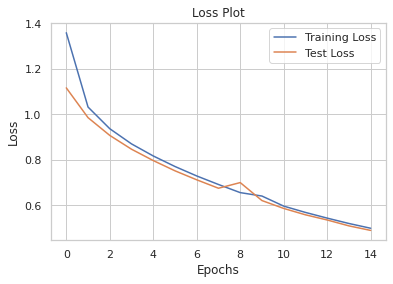

In [41]:
# Plot the training and test loss curves
plt.plot(loss_plot, label='Training Loss')
plt.plot(test_loss_plot, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()


#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

<h2 style="color: #3498db;">Model Evaluation</h2>
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [42]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input)# Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()#extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id])
        #map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [43]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [44]:
from nltk.translate.bleu_score import sentence_bleu

In [45]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [46]:
img_test=path_test.copy()

In [48]:
cap_test=cap_test.copy()

In [49]:
#modifying the given code as function to run it several times by changing weights
def predicted_caption_audio(random,autoplay=False,weights=(0.5, 0.5, 0, 0)):

    
    rid = np.random.randint(0, random)
    test_image = img_test[rid]
    #test_image = 'Flickr8K/Images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot,pred_test = evaluate(test_image)

    real_caption=filt_text(real_caption)      

    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)#set your weights)
    print(f"BELU score: {score*100}")

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attmap(result, attention_plot, test_image)

    #Let's use Google Text to Speech Online API from playing the predicted caption as audio
    speech = gTTS("Predicted Caption is: "+ pred_caption,lang = 'en', slow = False) 
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'
    #playsound('voice.wav')
    display.display(display.Audio(audio_file, rate=None,autoplay=autoplay))
    
    return test_image

<h2 style="color: #3498db;">Let's see how the model performs at work!</h2>

BELU score: 4.3180842775472395e-76
Real Caption: as the dog swims close
Prediction Caption: a white dog is swimming in a lake


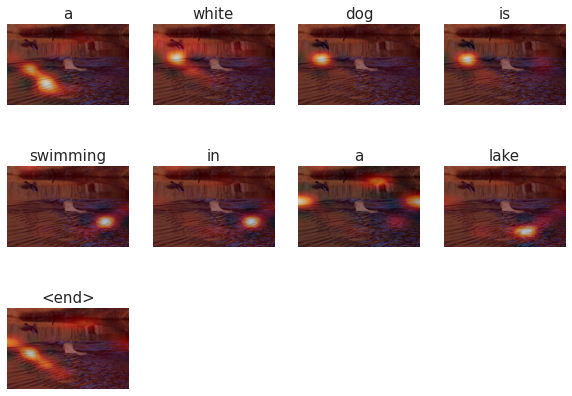

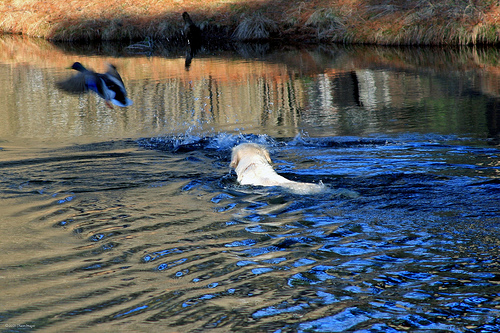

In [54]:
test_image=predicted_caption_audio(110,True,weights=(0.5,0.25,0,0))
Image.open(test_image)

BELU score: 61.27273003675492
Real Caption: a small baby with his mouth open in a green diaper being held in the water
Prediction Caption: a baby in a green diaper being held up in the water


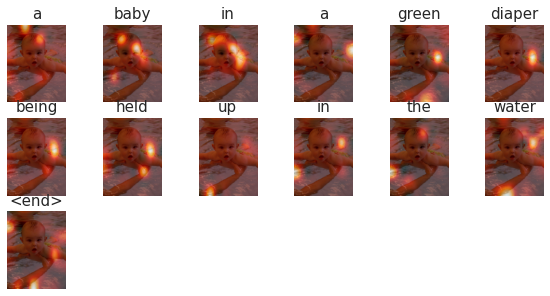

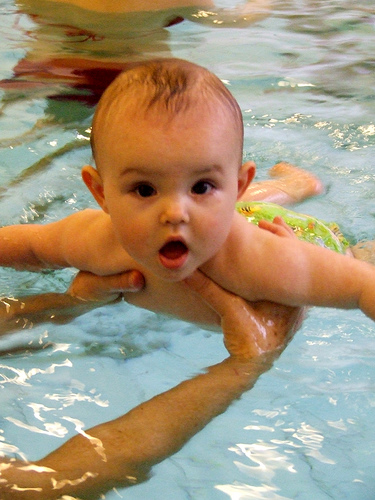

In [56]:
test_image=predicted_caption_audio(459,True,weights=(0.5,0.25,0,0))
Image.open(test_image)

BELU score: 36.61475238303926
Real Caption: a snowboarder flies in the air
Prediction Caption: a snowboarder performing a stunt


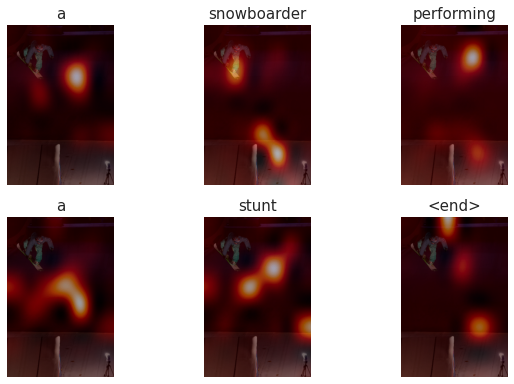

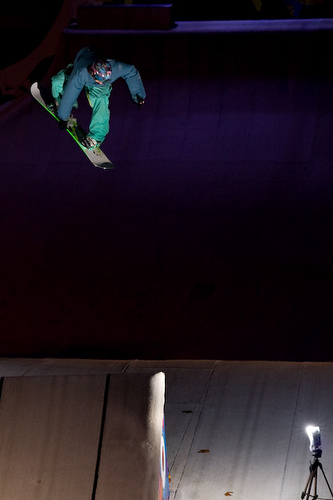

In [57]:
test_image=predicted_caption_audio(292,True,weights=(0.5,0.25,0,0))

Image.open(test_image)

BELU score: 41.8286448568372
Real Caption: a child running through the water
Prediction Caption: a boy is jumping from the water


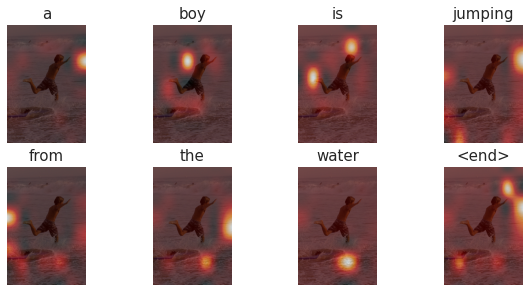

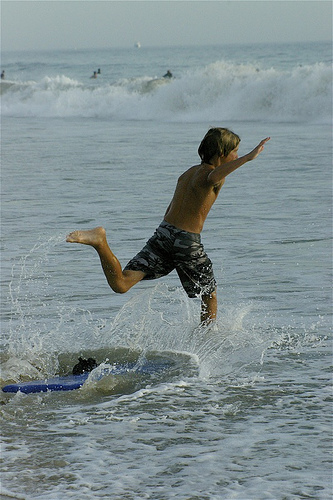

In [58]:
test_image=predicted_caption_audio(1572,True,weights=(0.5,0.25,0,0))

Image.open(test_image)

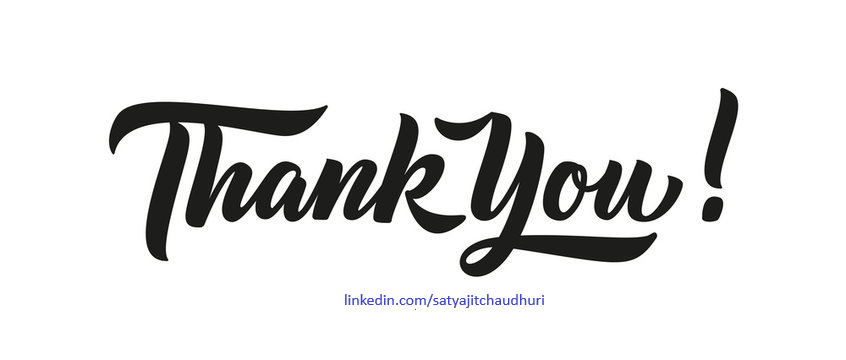